# Python Assignment 1
##  Name: Raj Jadhav 
### Batch: AUG03

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ps = pd.read_csv("playstore-analysis.csv")

In [3]:
Ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
Ps.shape

(10841, 13)

In [5]:
Ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


## TASKS

### 1. Data clean up – Missing value treatment
 

#### a. Drop records where rating is missing since rating is our target/study variable

In [6]:
Ps.Rating.isnull().sum()

1474

In [7]:
Ps.dropna(subset=["Rating"],inplace=True)

In [8]:
Ps.Rating.isna().sum()

0

#### b. Check the null values for the Android Ver column. 


In [9]:
Ps[Ps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##### i. Are all 3 records having the same problem? 


###### Above table shows null record from android ver column. In 3rd row in category column there is numeric value and in price column there is alphabetical word which dont make any sence.

##### ii. Drop the 3rd record i.e. record for “Life Made WIFI …” 
 

In [10]:
Ps=Ps[~Ps.App.str.contains("Life Made WI-Fi Touchscreen Photo Frame")]


In [11]:
Ps[Ps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


##### iii. Replace remaining missing values with the mode 

In [12]:
Ps['Android Ver'].fillna(Ps['Android Ver'].mode()[0], inplace=True)

In [13]:
Ps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

#### c. Current ver – replace with most common value 

In [14]:
Ps['Current Ver'].fillna(Ps['Current Ver'].mode()[0], inplace=True)


In [15]:
Ps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 2. Data clean up – correcting the data types 
##### a. Which all variables need to be brought to numeric types? 

In [16]:
Ps.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


###### Installs, Reviews & Price columns must be in numeric type.

##### b. Price variable – remove $ sign and convert to ﬂoat

In [17]:
Ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
Ps['Price']= Ps.Price.str.replace('$',' ').astype(float)

In [19]:
Ps['Price']


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64

##### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer 

In [20]:
Ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
Ps['Installs'].apply(str)


0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9366, dtype: object

In [22]:
Ps['Installs']=Ps['Installs'].str.replace('+','').str.replace(',','').astype(int)


In [23]:
Ps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [24]:
Ps["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int32

In [25]:
Ps.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


##### d. Convert all other identiﬁed columns to numeric 


###### Only remaining column is review which we have to convert into numeric

In [26]:
Ps['Reviews']= Ps['Reviews'].astype('int')


In [27]:
Ps.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


### 3. Sanity checks – check for the following and handle accordingly 
##### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store. 
###### i. Are there any such records? Drop if so. 

In [28]:
Ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
Ps[(Ps['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [30]:
Ps[(Ps['Rating']<1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


###### There are no such records

##### b. Reviews should not be more than installs as only those who installed can review the app. 
###### i. Are there any such records? Drop if so. 

In [31]:
Ps[Ps['Reviews']>Ps['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


###### there are 7 such records where reviews is greater than installs, we have to drop it.

In [32]:
index=Ps[Ps['Reviews']>Ps['Installs']].index
Ps.drop(labels=index,inplace=True)

In [33]:
Ps[Ps['Reviews']>Ps['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


###### 7 records are deleted.

### 4. Identify and handle outliers –
#### a. Price column
###### i. Make suitable plot to identify outliers in price 

In [34]:
import seaborn as sns

In [35]:
Ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9359 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9359 non-null   object 
 1   Category        9359 non-null   object 
 2   Rating          9359 non-null   float64
 3   Reviews         9359 non-null   int32  
 4   Size            9359 non-null   float64
 5   Installs        9359 non-null   int32  
 6   Type            9359 non-null   object 
 7   Price           9359 non-null   float64
 8   Content Rating  9359 non-null   object 
 9   Genres          9359 non-null   object 
 10  Last Updated    9359 non-null   object 
 11  Current Ver     9359 non-null   object 
 12  Android Ver     9359 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 950.5+ KB


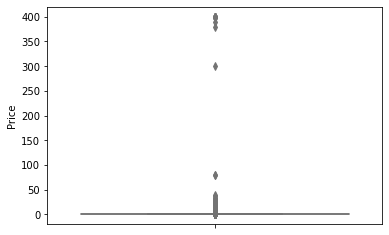

In [36]:
sns.boxplot(x='Price',data=Ps,palette='rainbow',orient="v");

###### ii. Do you expect apps on the play store to cost $200? Check out these cases 

In [37]:
Ps[Ps['Price']>200]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


###### There are 15 such records where price is greater than 200.

##### iii. After dropping the useless records, make the suitable plot again to identify outliers 

In [38]:
Ps.drop(Ps[Ps['Price']>200].index,inplace=True)


In [39]:
Ps[Ps['Price']>200]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


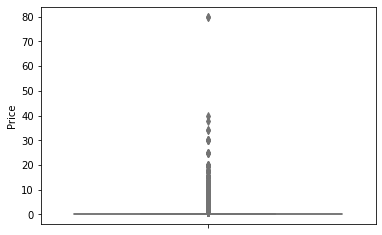

In [40]:
sns.boxplot(x='Price',data=Ps,palette='rainbow',orient="v");

##### iv. Limit data to records with price < $30 

In [41]:
Limit_Price = Ps[Ps['Price'] > 30].index
Ps.drop(labels= Limit_Price, inplace=True)

In [42]:
LP=Ps[Ps['Price'] > 30].index
LP.value_counts().sum()


0

##### b. Reviews column 
###### i. Make suitable plot 

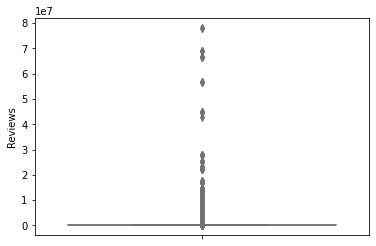

In [43]:
sns.boxplot(x='Reviews',data=Ps,palette='rainbow',orient="v")
plt.show()


###### ii. Limit data to apps with < 1 Million reviews 

In [44]:
RL = Ps[Ps['Reviews'] > 1000000 ].index
Ps.drop(labels = RL, inplace=True)


In [45]:
RL.value_counts().sum()

704

##### 704 apps has been droped which has more than 1000000 reviews.

#### c. Installs 
##### i. What is the 95th percentile of the installs? 

In [46]:
Percentile = Ps.Installs.quantile(0.95)


In [47]:
print(Percentile)

10000000.0


###### 10000000.0 is the 95th percentile of Installs.



###### ii. Drop records having a value more than the 95th percentile 

In [48]:
import warnings 
warnings.filterwarnings("ignore")

In [49]:
DR =Ps[Ps["Installs"]>10000000.0]

In [50]:
DR

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,21516.529524,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,21516.529524,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
225,Secure Folder,BUSINESS,3.8,14760,8600.000000,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.000000,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.000000,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.000000,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895,25000.000000,50000000,Free,0.0,Everyone,Racing,"May 23, 2018",1.4.4,4.1 and up


In [51]:
DR.drop(DR.index,inplace=True)


In [52]:
DR

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Data analysis to answer business questions 
#### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values? 
##### a. How do you explain this? 

Skewnes is -1.7617009755273947
('The median and mean is', 4.3, 4.172492471623822)


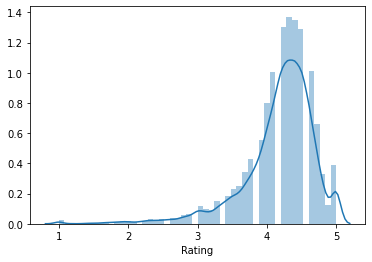

In [53]:
sns.distplot(Ps['Rating'])
print("Skewnes is",(Ps['Rating']).skew())
print(("The median and mean is",Ps['Rating'].median(),Ps['Rating'].mean()))
 


##### Skewness is -1.7617009755273947
##### Median is greater than mean

#### b. What is the implication of this on your analysis? 

##### graph is negatively skewed that means mean is lesser that mode and median

### 6. What are the top Content Rating values?
#### a. Are there any values with very few records? 

In [185]:
Ps['Content Rating'].value_counts()

Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

##### There are 2 values having very few records.

#### b. If yes, drop those as they won’t help in the analysis 

In [186]:
DCR=Ps[(Ps['Content Rating']=='Adults only 18+') | (Ps['Content Rating']=='Unrated') ]
Ps.drop(DCR.index,inplace=True)

In [187]:
Ps['Content Rating'].value_counts()

Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

### 7. Effect of size on rating
#### a. Make a joinplot to understand the effect of size on rating
#### b. Do you see any patterns? 
#### c. How do you explain the pattern? 

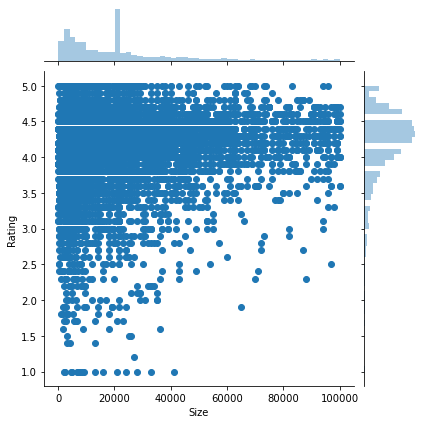

In [188]:
sns.jointplot(x='Size',y='Rating',data=Ps,kind="scatter");

##### In this joinplot we see a pattern 
##### As size increases rating also increases

### 8. Effect of price on rating 
#### a. Make a jointplot (with regression line) 
#### b. What pattern do you see? 
#### c. How do you explain the pattern? 

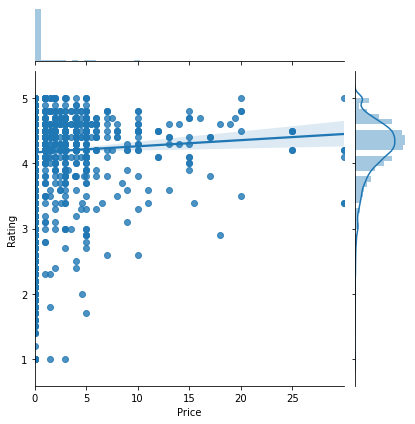

In [189]:
sns.jointplot(x='Price',y='Rating',data=Ps,kind="reg");

##### we can see a pattern, as price increases rating also increases, 
##### here in graph we can see apps with higher price mostly has rated near to 4

#### d. Replot the data, this time with only records with price > 0 
##### e. Does the pattern change? 
##### f. What is your overall inference on the effect of price on the rating 

In [190]:
Ps1=Ps[Ps['Price']>0]


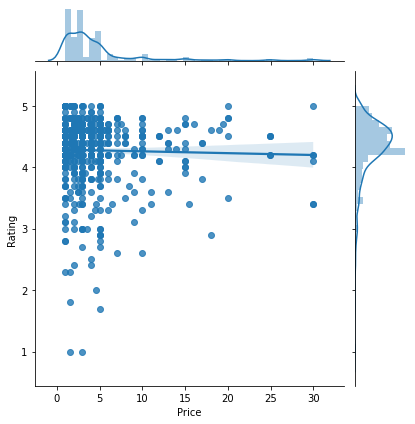

In [191]:
sns.jointplot(x='Price',y='Rating',data=Ps1,kind="reg");

##### In this plot the pattern completely changed.
##### By the above  pattern we noticed that  regression line is slightly decreasing.

### 9. Look at all the numeric interactions together – 
#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price' 

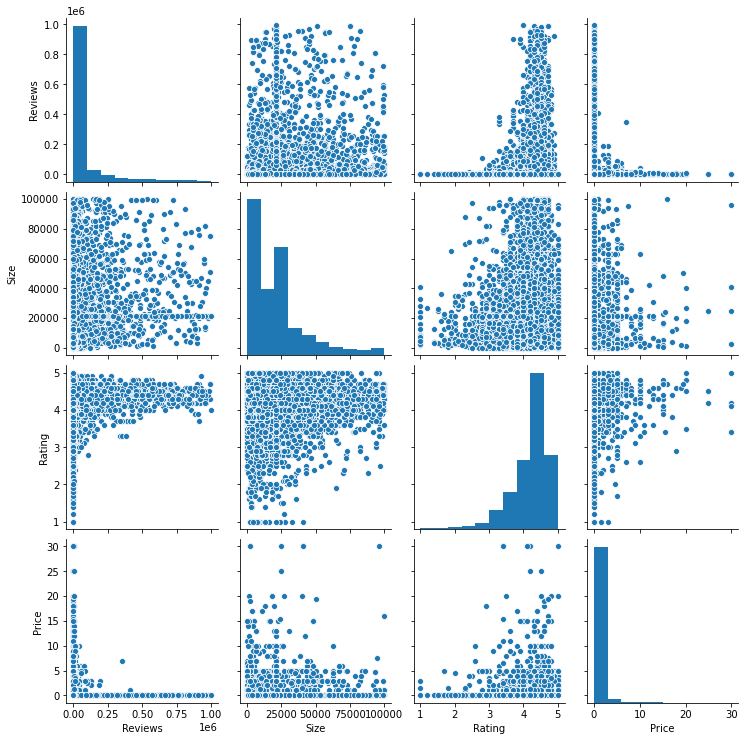

In [192]:
PP= Ps[[ 'Reviews', 'Size', 'Rating', 'Price']]
sns.pairplot(PP);

### 10.Rating vs. content rating 
#### a. Make a bar plot displaying the rating for each content rating 

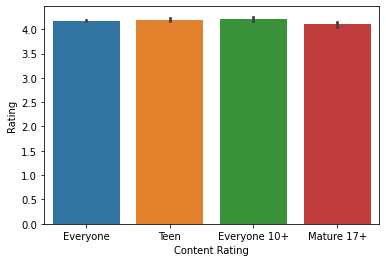

In [193]:
sns.barplot(x="Content Rating",y="Rating",data=Ps);

#### b. Which metric would you use? Mean? Median? Some other quantile? 
##### since we removed the outliers we use Mean

In [204]:
BP=Ps.groupby(['Content Rating'])['Rating'].mean()

In [205]:
BP

Content Rating
Everyone        4.171108
Everyone 10+    4.217211
Mature 17+      4.099760
Teen            4.198821
Name: Rating, dtype: float64

In [206]:
Ps.groupby(['Content Rating'])['Rating'].median()

Content Rating
Everyone        4.3
Everyone 10+    4.3
Mature 17+      4.2
Teen            4.2
Name: Rating, dtype: float64

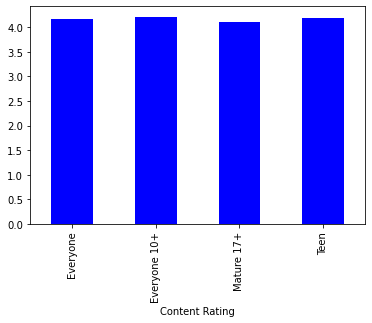

In [208]:
BP.plot.bar(color="b");



### 11. Content rating vs. size vs. rating – 3 variables at a time 
#### a. Create 5 buckets (20% records in each) based on Size 

In [216]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
Ps['Bucket Size'] = pd.cut(Ps['Size'],bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])


In [217]:
pd.pivot_table(Ps, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.146001,4.247561,4.010582,4.182275
20k-40k,4.203324,4.166667,4.156291,4.173163
40k-60k,4.171457,4.265217,4.190476,4.242982
60k-80k,4.244221,4.280769,4.200000,4.273016
80k-100k,4.260127,4.304762,4.252632,4.269231


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination 

In [220]:
CRvSB=pd.pivot_table(Ps, values='Rating', index='Bucket Size', columns='Content Rating', 
                     aggfunc=lambda x:np.percentile(x,20))
CRvSB

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.10,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


#### c. Make a heatmap of this 
##### i. Annotated 
 

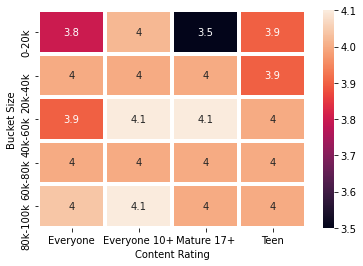

In [221]:
sns.heatmap(CRvSB,annot=True,linewidths=3);

##### ii. Greens color map 

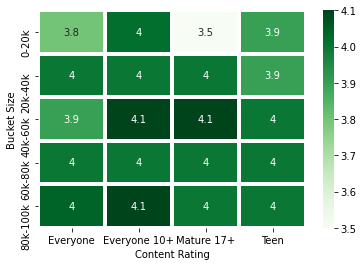

In [222]:
sns.heatmap(CRvSB,annot=True,linewidths=3,cmap="Greens");

##### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
###### This is not true that lighter app is prefered in all categories, since heavier apps (80k-100k) is getting more good rating as compared to lighter app

# END